## Лабораторная работа №4
### Метрические методы классификации
#### Цель работы
изучение принципов построения информационных систем с использованием метрических методов классификации.

#### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import random



from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
data_source = "music/Music-genre.csv"
data = pd.read_csv(data_source, delimiter=',')
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


#### В наборе данных music_genre представлены следующие признаки
- уникальный идентификатор для каждого трека
- имя исполнителя
- название трека
- рейтинг
- акустичность
- танцевальность
- длительность музыки в мс
- энергия
- инструментальность
- музыкальный ключ
- живость
- громкость звучания (Db)
- лад
- присутствие текста в песне
- темп
- дата выхода трека
- эмоциональное содержание 
- музыкальный_жанр

В целях упрощения задачи классификации возьмем во внимание только некоторые признаки

In [165]:
data_source = "../datasets/music/Music-genre.csv"
data = pd.read_csv(data_source, delimiter=',')
selected_columns = ['danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'music_genre']
data_1 = data[selected_columns]
print(data_1['music_genre'].unique())


random_indices = np.random.choice(data_1.index, size=1000, replace=False)
data_2 = data_1.iloc[random_indices]
data_2.to_csv("random_data.csv", index=False)
data_3 = pd.read_csv("random_data.csv", delimiter=',')
#data_3 = data_3[(data_3.music_genre == "Classical") | 
#                (data_3.music_genre == "Rap") |]
data_3.dropna(inplace=True)
print(data_3.head())

['Electronic' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']
   danceability  energy  instrumentalness  liveness  valence  music_genre
1         0.776   0.874          0.020200    0.0707    0.389   Electronic
2         0.660   0.781          0.000000    0.1960    0.875        Blues
3         0.822   0.731          0.243000    0.1720    0.187   Electronic
4         0.651   0.412          0.000017    0.1090    0.437          Rap
5         0.304   0.938          0.012600    0.3200    0.377  Alternative


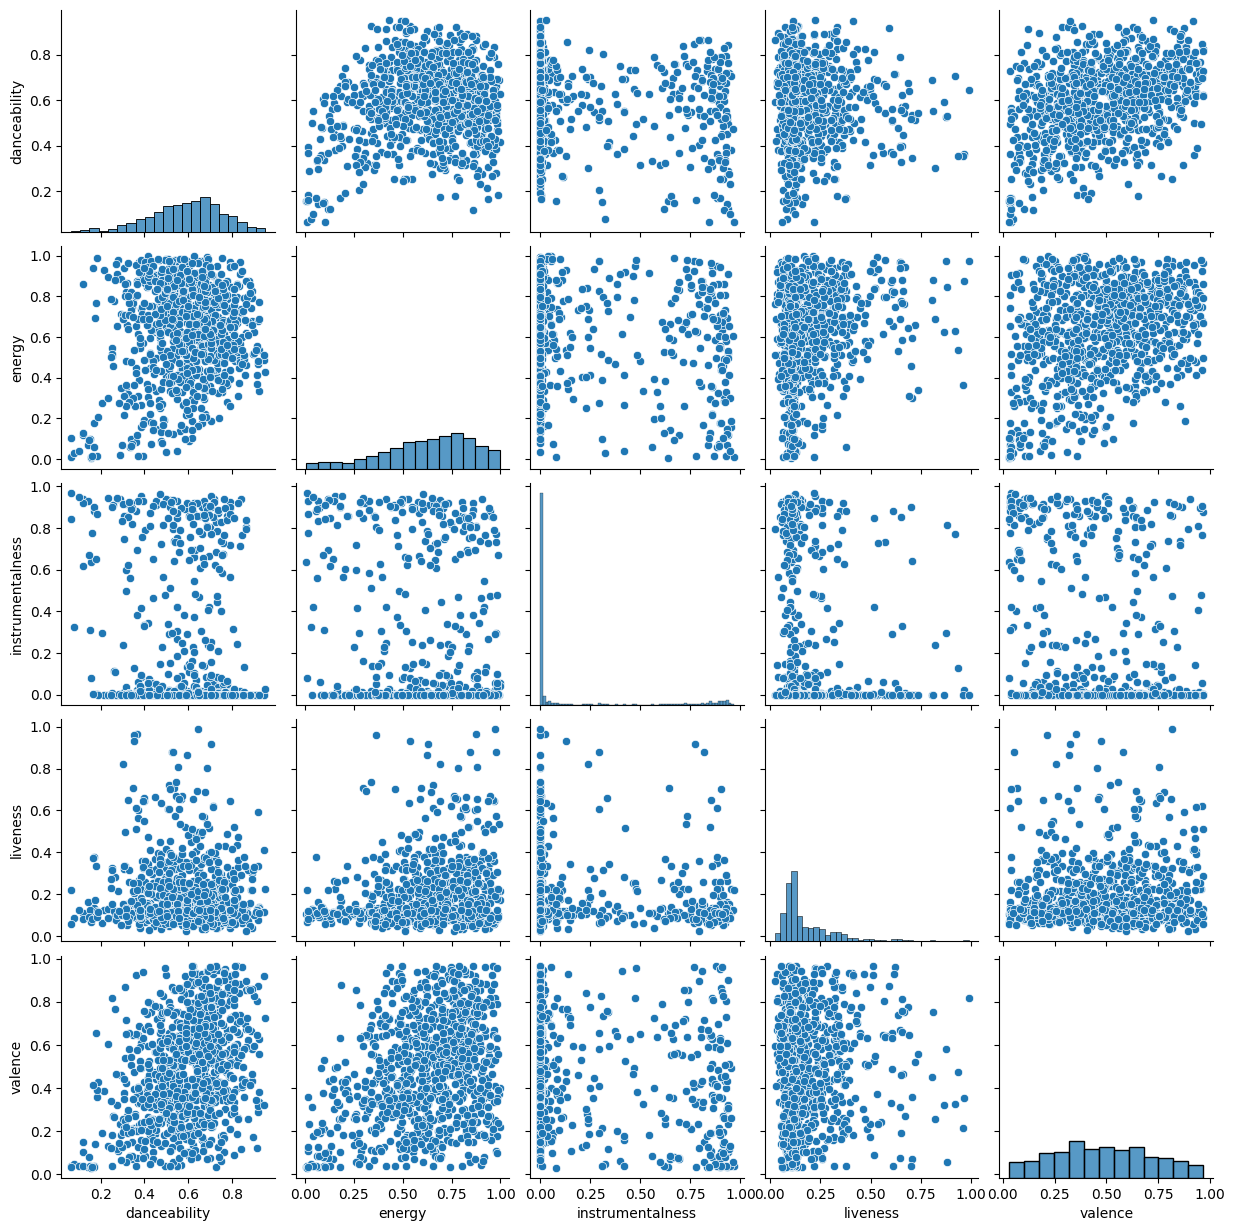

In [166]:
sns.pairplot(data_3);

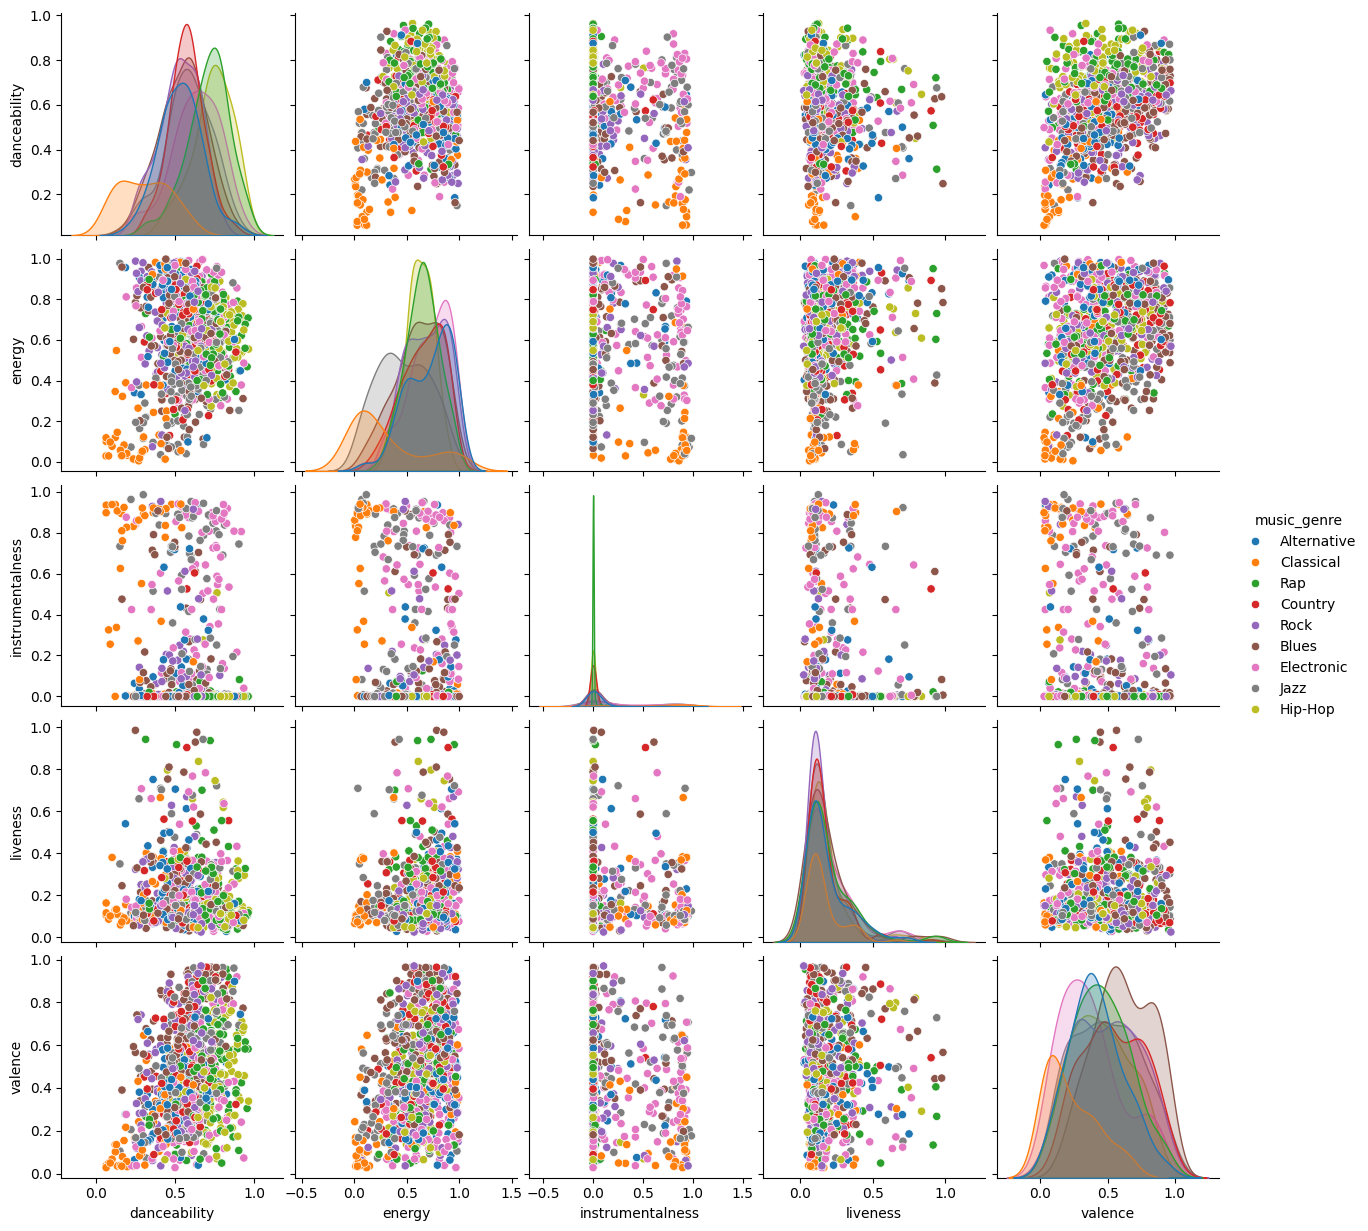

In [146]:
sns.pairplot(data_3, hue='music_genre');

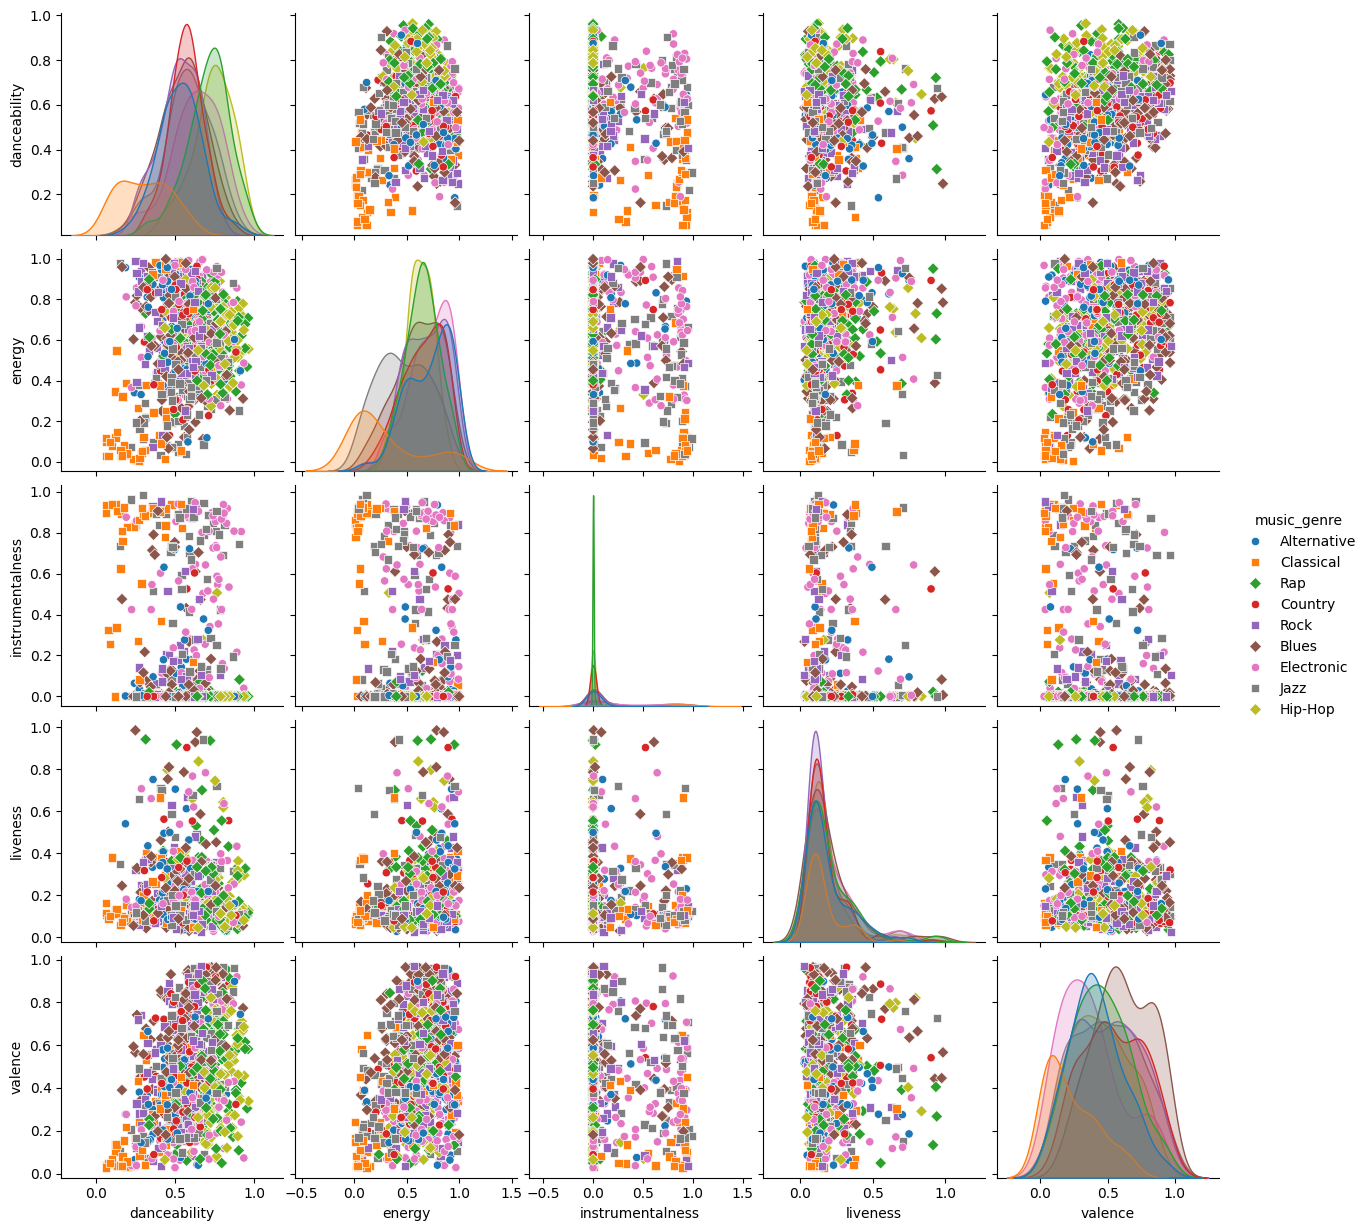

In [148]:
sns.pairplot(data_3, hue='music_genre', markers=["o", "s", "D", "o", "s", "D", "o", "s", "D"]);

In [149]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data_3[['danceability', 'energy', 'instrumentalness', 'liveness', 'valence']].values
y_train = data_3['music_genre'].values

K = 3 # Количество соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_new = np.array([[0.481, 0.5390, 0.000001, 0.0898, 0.411]])
# Получение ответа для нового объекта
target = knn.predict(X_new)
print(target)

['Alternative']


In [158]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    data_3[['danceability', 'energy', 'instrumentalness', 'liveness', 'valence']], 
    data_3['music_genre'], 
    test_size=0.3, 
    random_state=17)

K = 3 # Количество соседей
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.2878228782287823


Вероятность угадывания жанра равна 1/9 = 0.(1), а в результате анализа получается 0.2878228782287823

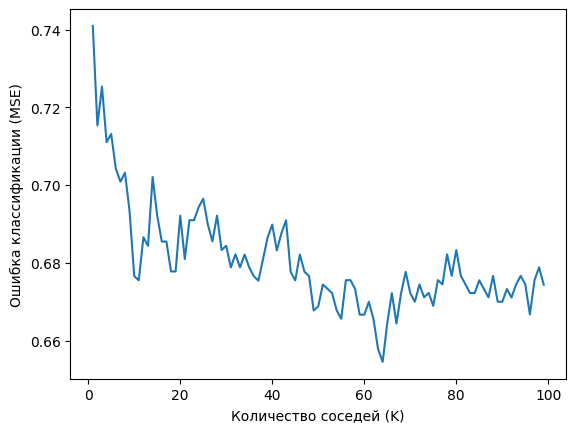

Оптимальные значения K:  [64]


In [160]:
# Реализация процедуры выбора оптимального параметра на основе cross validation error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,100))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(
        knn, 
        data_3[['danceability', 'energy', 'instrumentalness', 'liveness', 'valence']], 
        data_3['music_genre'], 
        cv=10, 
        scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

C:\Users\Саша\AppData\Local\Temp\ipykernel_12580\3542836836.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\Саша\AppData\Local\Temp\ipykernel_12580\3542836836.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
C:\Users\Саша\AppData\Local\Temp\ipykernel_12580\3542836836.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

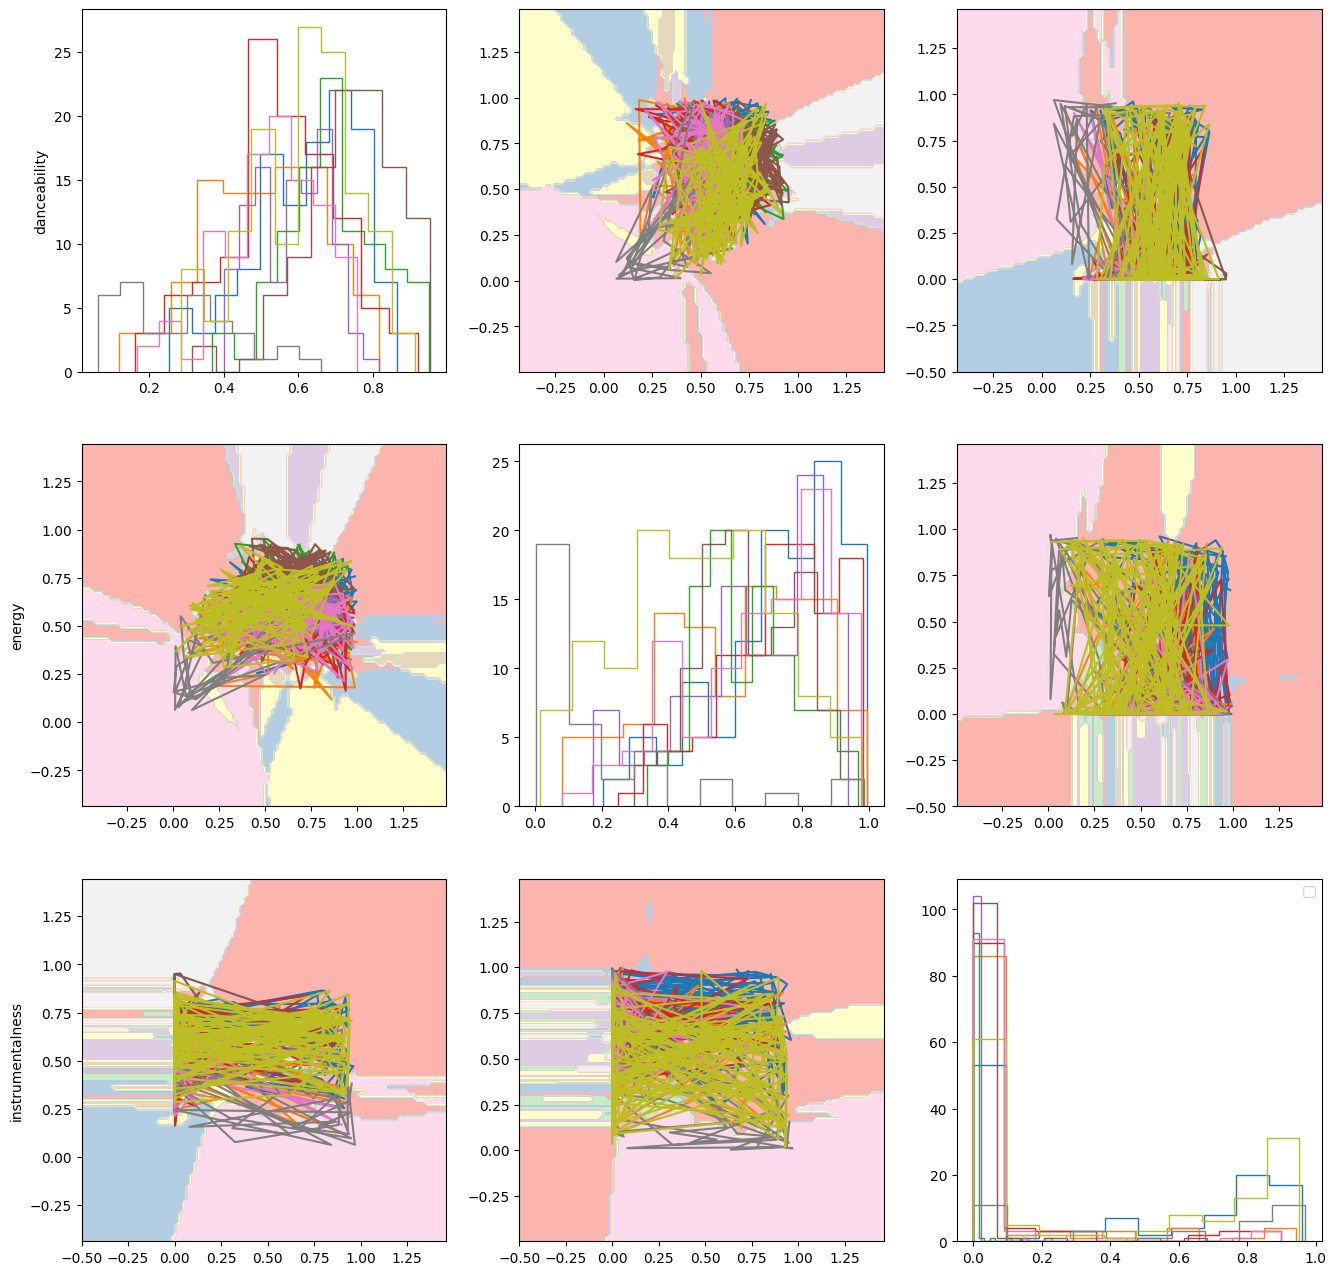

In [168]:
dX = data_3[['danceability', 'energy', 'instrumentalness', 'liveness', 'valence']]
dX = dX.iloc[:,0:3]
dy = data_3['music_genre'].replace({'Electronic': 0, 'Jazz': 1, 'Alternative': 2, 'Country': 3, 'Rap': 4, 'Blues': 5, 'Rock': 6, 'Classical': 7, 'Hip-Hop': 8})
#['Electronic' nan 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock' 'Classical' 'Hip-Hop']
#plot_markers = ['r*', 'g^', 'bo', ]
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(3, 3, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02  

# Обходим все subplot
for i in range(0,3):
    for j in range(0,3):

        # Строим решающие границы 
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=3)
            model.fit(dX.iloc[:, [i,j]].values, dy.values)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            places[i,j].contourf(xx, yy, p, cmap='Pastel1') 
      
        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                               #   color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j], 
            #                      plot_markers[id_answer], 
                                  label=answers[id_answer], markersize=6)
        
        if j==0:
            places[i, j].set_ylabel(dX.columns[i])
        
        if i==3:
            places[i, j].set_xlabel(dX.columns[j]) 
plt.legend()
plt.show()

In [177]:
from sklearn.neighbors import KNeighborsClassifier

X_train = data_3[['danceability', 'energy', 'instrumentalness', 'liveness', 'valence']].values
y_train = data_3['music_genre'].values

K = 13 # Найденное оптимальное значение соседей

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта

danceability = float(input('Введите меру танцевальности: '))
energy = float(input('Введите меру энергичности: '))
instrumentalness = float(input('Введите инструментальность: '))
liveness = float(input('Введите меру живости: '))
valence = float(input('Введите меру эмоционального содержания: '))
#petal_width = float(input('Введите ширину лепестка: '))
X_new = np.array([[danceability, energy, instrumentalness, liveness, valence]])

# Получение ответа для нового объекта
target = knn.predict(X_new)
# print(target)

# if target == 0:
#     print("cl")
#     music_genre = 'Classical'
# elif target == 1:
#     print("Rap")
#     music_genre = 'Rap'

print('\n Жанр: ', target)

Введите меру танцевальности:  0.8
Введите меру энергичности:  0.9
Введите инструментальность:  0.5
Введите меру живости:  0.9
Введите меру эмоционального содержания:  1



 Жанр:  ['Blues']


### Контрольные вопросы

#### Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.
Основные методы метрической классификации, такие как метод ближайшего соседа (1-NN) и метод k ближайших соседей (k-NN), основаны на идее определения класса объекта на основе его ближайших соседей в признаковом пространстве. Вот их основные особенности:

##### Метод ближайшего соседа (1-NN):

Для каждого объекта классификации он находит ближайшего соседа в тренировочном наборе данных, используя какую-либо метрику расстояния, обычно евклидово расстояние.
Классификация объекта происходит путем присвоения ему класса его ближайшего соседа.
1-NN склонен к переобучению и может быть шумочувствительным, так как он смотрит только на одного ближайшего соседа.
##### Метод k ближайших соседей (k-NN):

В отличие от 1-NN, k-NN находит k ближайших соседей объекта, где k - это заданное число соседей.
Объекту присваивается класс, который наиболее часто встречается среди его k ближайших соседей.
Выбор k влияет на гладкость границ решений: маленькое k приводит к сложным границам, большое k приводит к более гладким границам.
k-NN менее склонен к переобучению по сравнению с 1-NN, но может быть чувствительным к выбору k и масштабу признаков.
Особенности и недостатки методов метрической классификации:

Простота и интуитивность: Метрические методы просты в понимании и реализации.
Не требуется предварительная обработка данных: Метрические методы не требуют предварительной нормализации данных и могут работать с различными типами признаков.
Но они могут быть вычислительно затратными для больших наборов данных, так как требуется вычисление расстояний для каждой пары объектов.
Чувствительность к выбору метрики: Результаты могут сильно зависеть от выбора метрики расстояния.
Не учитывают внутреннюю структуру данных: Метрические методы не учитывают скрытую структуру данных, и их производительность может быть низкой в некоторых случаях.
Итак, методы метрической классификации, такие как 1-NN и k-NN, подходят для небольших и средних наборов данных, где они могут обеспечить хорошую производительность при правильном выборе гиперпараметров и метрик расстояния.

#### Поясните основные принципы и этапы реализации метода kNN.
Метод k-ближайших соседей (k-NN) - это простой алгоритм классификации, который классифицирует объекты на основе классов их k ближайших соседей в признаковом пространстве. Вот основные принципы и этапы реализации метода k-NN:

##### Принципы:

##### Локальность: Гипотеза локальности состоит в том, что близкие объекты в признаковом пространстве имеют схожие классы. Это предположение лежит в основе метода k-NN.

##### Метрика расстояния: Для определения ближайших соседей необходимо выбрать метрику расстояния, такую как евклидово расстояние, манхэттенское расстояние и другие. Метрика расстояния используется для измерения сходства между объектами.

##### Этапы реализации метода k-NN:

Загрузка и предобработка данных: Сначала загружаются и подготавливаются данные для обучения и тестирования. Это включает в себя разделение данных на обучающий и тестовый наборы.

Выбор метрики расстояния: Выберите метрику расстояния, которая будет использоваться для измерения расстояния между объектами в признаковом пространстве. Наиболее распространенной метрикой является евклидово расстояние.

Выбор числа соседей (k): Выберите количество ближайших соседей (k), которые будут использоваться для классификации объекта. Значение k должно быть выбрано внимательно, так как оно может влиять на результаты классификации.

Вычисление расстояний: Для каждого объекта тестового набора данных вычисляются расстояния до всех объектов обучающего набора данных с использованием выбранной метрики расстояния.

Нахождение k ближайших соседей: Для каждого объекта тестового набора данных выбираются k объектов обучающего набора данных с наименьшими расстояниями.

Классификация: Для каждого объекта тестового набора данных определяется класс, который наиболее часто встречается среди его k ближайших соседей. Этот класс присваивается объекту.

Оценка производительности: После классификации всех объектов тестового набора данных оценивается производительность метода k-NN, например, с использованием метрик точности, полноты, F1-меры и других.

Выбор оптимальных параметров: Можно выполнять подбор параметров, таких как метрика расстояния и значение k, для оптимизации производительности метода.

Метод k-NN - это относительно простой метод, который может быть эффективным для задач классификации, особенно в случаях, когда данные имеют локальную структуру. Однако для его эффективной работы необходимо правильно настроить параметры и подготовить данные.

#### Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.
Выбор количества соседних объектов (k) в методе k-ближайших соседей (k-NN) важен и влияет на производительность алгоритма. Принцип выбора значения k определяет, сколько соседних объектов будет учтено при классификации целевого объекта. Вот некоторые ключевые моменты, которые следует учитывать при выборе значения k:

##### Маленькое k (k = 1):

Если k слишком маленькое, например, k = 1, то классификация будет сильно зависеть от одного ближайшего соседа.
Это может привести к шуму и нестабильным результатам, особенно если в данных есть выбросы или неточности.
Маленькое k может привести к сложным, нерегулярным границам решений.
##### Среднее k:

Обычно выбирают средние значения k, например, k = 3, 5 или 10.
Средние значения k обычно более устойчивы и менее склонны к переобучению по сравнению с маленькими k.
Они могут обеспечивать хороший баланс между сглаженными границами решений и точностью классификации.
##### Большое k:

Если k слишком большое, например, k равно размеру обучающей выборки, то классификация будет скорее всего соответствовать наиболее популярному классу в обучающей выборке.
Это может привести к сглаженным, гладким границам решений, но может упустить детали и разделение классов.
Процесс выбора значения k обычно включает в себя эксперименты и валидацию, например, кросс-валидацию. Вам нужно выбрать значение k, которое обеспечивает наилучшую производительность на ваших данных. Оптимальное значение k может зависеть от конкретной задачи, структуры данных и количества доступных обучающих данных.

##### Важно помнить, что выбор k - это компромисс между сглаженностью границ решений и точностью классификации, и нет универсального значения k, которое подходило бы для всех задач.

#### В чем заключается метод парзеновского окна?
Метод парзеновского окна (Parzen Window) - это один из методов, используемых для оценки плотности вероятности объектов в многомерных пространствах. Он играет важную роль в различных статистических задачах, включая классификацию, кластеризацию и оценку плотности вероятности. Основная идея метода парзеновского окна заключается в том, что объекту присваивается плотность вероятности, основанная на "окне" или "ядерной функции", которая центрируется на этом объекте и оценивается с использованием соседних объектов.

##### Вот основные принципы метода парзеновского окна:

Окно и ядерная функция: Перед использованием метода парзеновского окна нужно выбрать ядерную функцию и размер окна. Ядерная функция определяет, как вес объектов убывает с расстоянием от целевого объекта, а размер окна определяет, сколько ближайших соседей будут учтены.

Ядерная функция: Обычно в качестве ядерной функции используется гауссово ядро (гауссиана), которое имеет плотность вероятности, аналогичную нормальному распределению. Гауссово ядро имеет следующую форму: [K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}}]

Здесь (u) - расстояние между целевым объектом и соседними объектами.

Оценка плотности вероятности: Для каждого объекта оценка плотности вероятности вычисляется как взвешенная сумма ядерных функций для всех соседей. Оценка плотности вероятности объекта (x) в многомерном пространстве выглядит следующим образом: [P(x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{h^d} K\left(\frac{|x - x_i|}{h}\right)]

Где:

(n) - количество объектов в обучающей выборке.
(h) - ширина окна (ширина ядерной функции).
(d) - количество признаков.
(x_i) - соседний объект.
Классификация или оценка плотности вероятности: В задачах классификации метод парзеновского окна может использоваться для оценки плотности вероятности объектов в разных классах. Объекту присваивается класс, который имеет наибольшую оценку плотности вероятности. В задачах оценки плотности вероятности метод может использоваться для аппроксимации плотности данных в заданной области пространства.

##### Метод парзеновского окна обладает гибкостью и может адаптироваться к различным формам данных. Однако он может быть вычислительно затратным, особенно в многомерных пространствах, и требует настройки параметров, таких как размер окна (h) и выбор ядерной функции.

#### Назовите, какие параметры оптимизируют в методах kNN?
##### В методах k-ближайших соседей (k-NN) следующие параметры обычно оптимизируют:

Количество ближайших соседей (k): Один из самых важных параметров k-NN. Выбор оптимального значения k может значительно повлиять на производительность алгоритма. Слишком маленькое k может привести к переобучению, а слишком большое k может привести к сглаженным границам решений. Количество ближайших соседей обычно подбирают с помощью кросс-валидации.

Метрика расстояния: Выбор подходящей метрики расстояния (например, евклидово расстояние, манхэттенское расстояние, косинусное расстояние и др.) может быть важным для оптимальной работы алгоритма в зависимости от типа данных и задачи.

Веса соседей: В некоторых вариантах k-NN можно вводить веса для соседей в зависимости от их расстояния до целевого объекта. Ближайшие соседи могут иметь больший вес в прогнозировании, чем более далекие.

Параметры ядра и окна (если используется метод парзеновского окна): Если вы используете метод парзеновского окна для оценки плотности вероятности, вам придется выбирать параметры ядра (например, гауссово ядро) и размер окна (ширина ядерной функции).

Обработка данных: Вы также можете оптимизировать методы предварительной обработки данных, такие как нормализация или стандартизация, чтобы улучшить производительность k-NN.

Выбор признаков: Важно выбирать подходящие признаки и исключать ненужные, чтобы уменьшить размерность данных и снизить вычислительную нагрузку.

##### В зависимости от конкретной задачи и типа данных, параметры могут быть настроены с использованием методов оптимизации, а также путем применения кросс-валидации для оценки производительности модели с разными значениями параметров.